## Classification:
- Binary classification
- Random Forest Classifier
- Stochastic Gradient Descent Classifier (SGD)
- Support Vector Classifier (SVC)

## Regression:
- Linear Regression
- Polynomial Regression
- Random Forest Regression
- comparison plot for: Gradient Boosting Regression, Random Forest Regression, Linear Regression -> Voting Regression

## Dataset analysis:
- data structure
- mean
- correlation (heatmap + scatterplots)

### Error metrics:
- R^2
- RMSE
- manually calculated squared error

### Additionally:
- reports on classifications (confusion matrix, error metrics values, correct and predicted values comparison)
- feature importance
- cumulative importances
- prediction using only "important" features

In [1]:
# Importing required packages.
from __future__ import print_function

import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt

In [2]:
# Loading dataset
wine = pd.read_csv('../input/winequality-white.csv', sep=';')

# Let's check how the data is distributed
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
# Information about the data columns:
# 1 - fixed acidity;
# 2 - volatile acidity;
# 3 - citric acid;
# 4 - residual sugar;
# 5 - chlorides;
# 6 - free sulfur dioxide;
# 7 - total sulfur dioxide;
# 8 - density;
# 9 - pH;
# 10 - sulphates;
# 11 - alcohol.
# 
# Output variable(based on sensory data):
# 12 - quality(score between 0 and 10).

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


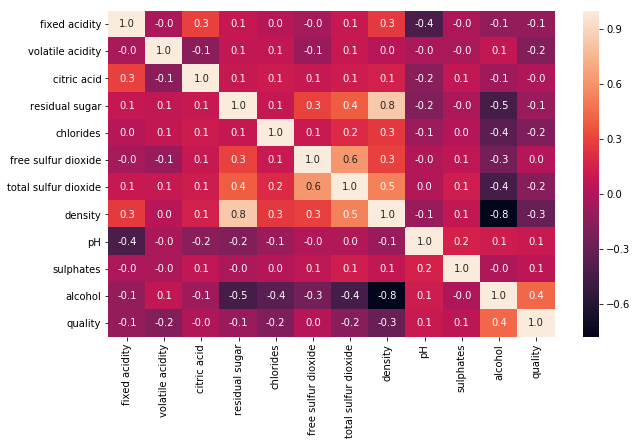

In [7]:
fig = plt.figure(figsize=(10, 6))
sns.heatmap(wine.corr(), annot=True, fmt='.1f')
plt.show()

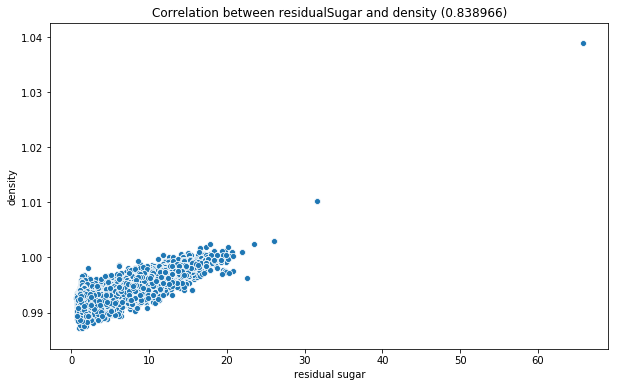

In [8]:
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between residualSugar and density (0.838966)')
sns.scatterplot(x='residual sugar', y='density', data=wine)
plt.show()

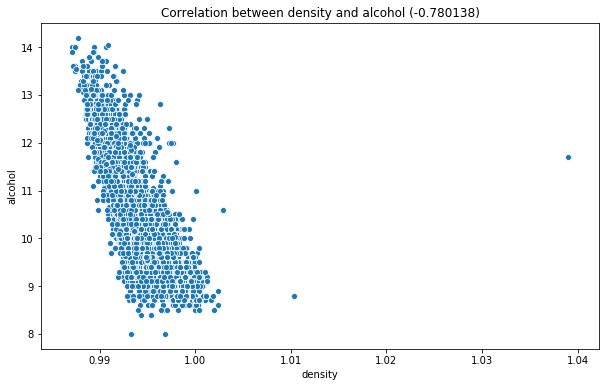

In [9]:
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between density and alcohol (-0.780138)')
sns.scatterplot(x='density', y='alcohol', data=wine)
plt.show()

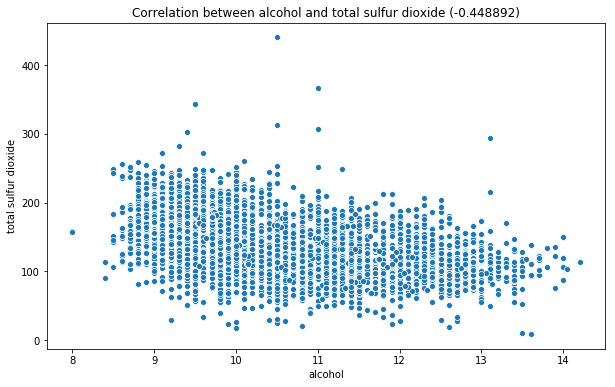

In [10]:
# No correlation between alcohol and total sulfur dioxide
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between alcohol and total sulfur dioxide (-0.448892)')
sns.scatterplot(x='alcohol', y='total sulfur dioxide', data=wine)
plt.show()

In [11]:
# Histogram of wine quality distribution (output values)
wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

(array([  20.,  163., 1457., 2198.,  880.,  175.,    5.]),
 array([3.        , 3.85714286, 4.71428571, 5.57142857, 6.42857143,
        7.28571429, 8.14285714, 9.        ]),
 <a list of 7 Patch objects>)

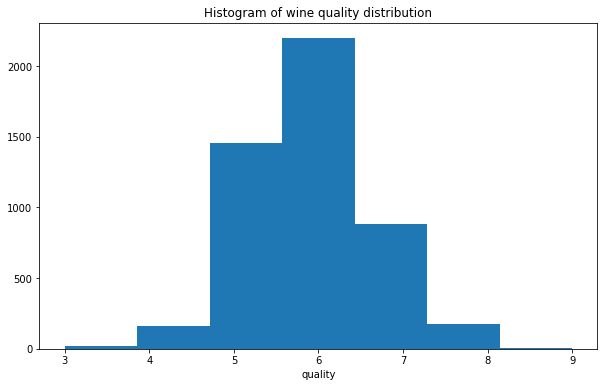

In [12]:
fig = plt.figure(figsize=(10, 6))
plt.title('Histogram of wine quality distribution')
plt.xlabel('quality')
plt.hist(wine['quality'], bins=7)

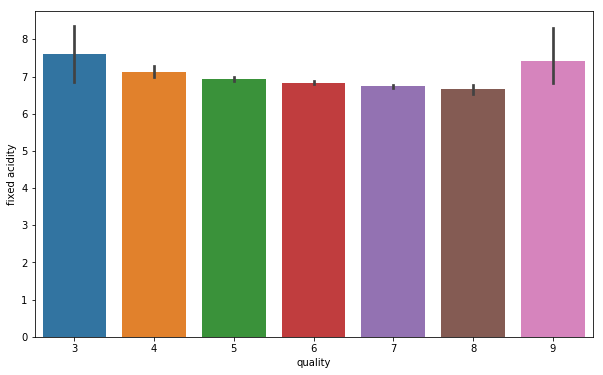

In [13]:
# Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='fixed acidity', data=wine)
plt.show()

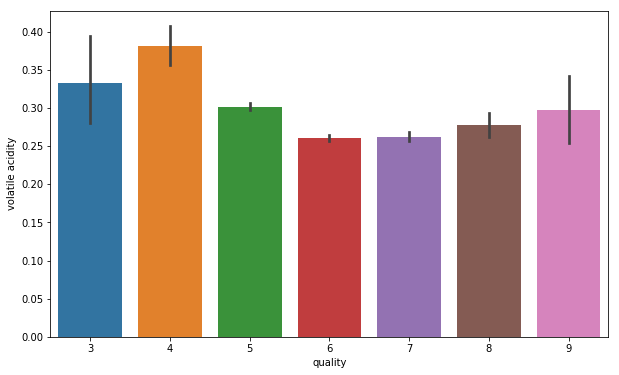

In [14]:
# Here we see that its quite a downing trend in the volatile acidity as we go higher the quality
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='volatile acidity', data=wine)
plt.show()

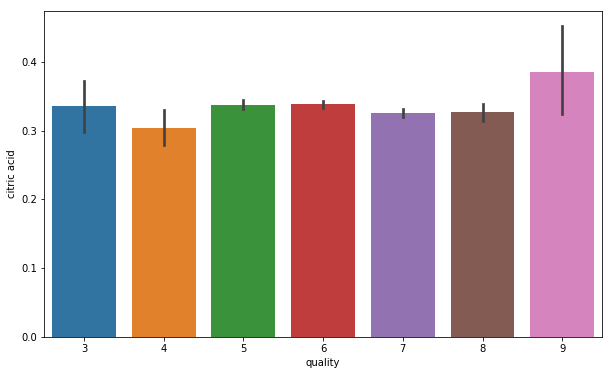

In [15]:
# Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='citric acid', data=wine)
plt.show()

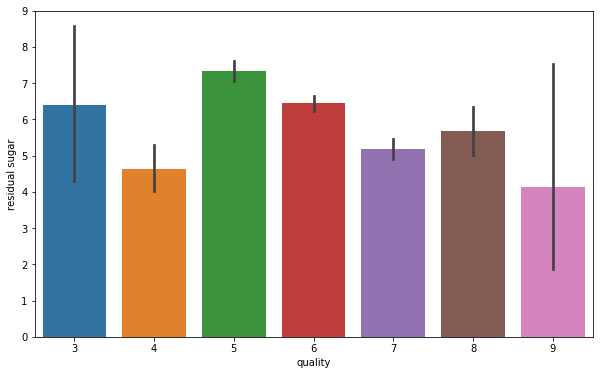

In [16]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='residual sugar', data=wine)
plt.show()

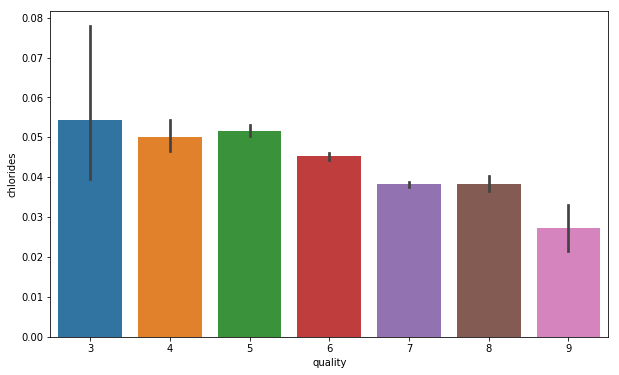

In [17]:
# Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='chlorides', data=wine)
plt.show()

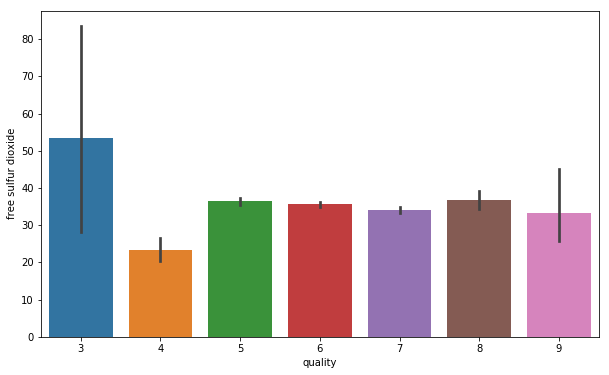

In [18]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine)
plt.show()

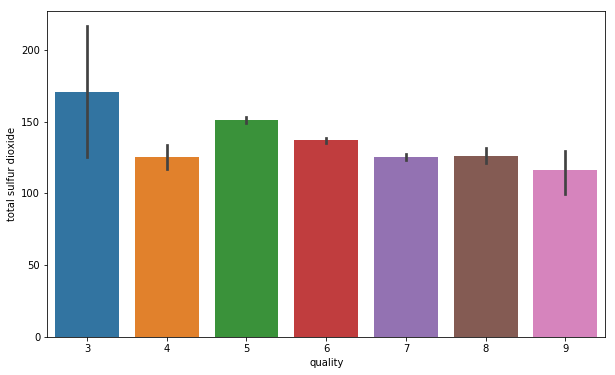

In [19]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine)
plt.show()

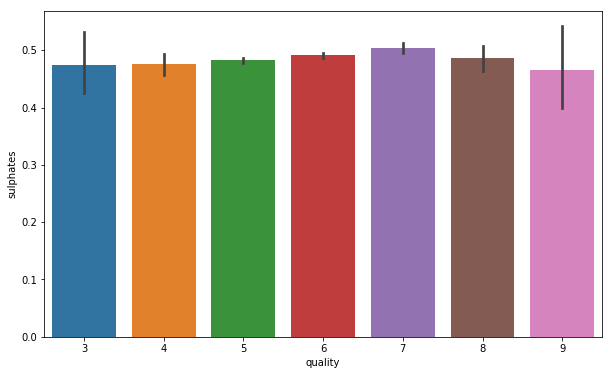

In [20]:
# Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='sulphates', data=wine)
plt.show()

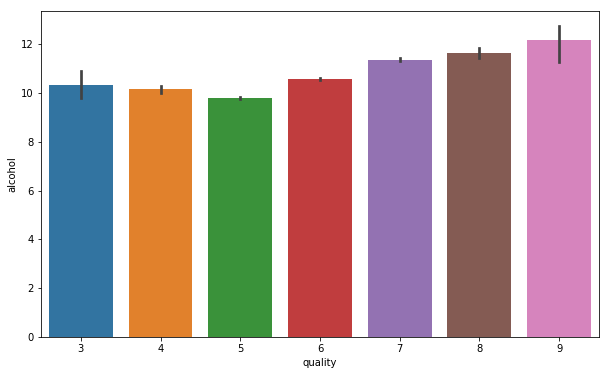

In [21]:
# Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='alcohol', data=wine)
plt.show()

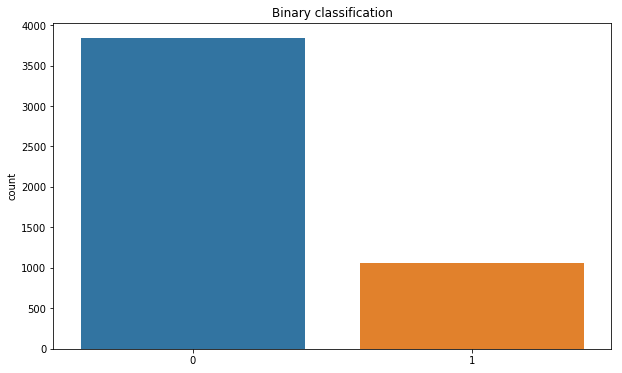

In [22]:
# Binary classification (bad / good)

# Preprocessing Data for performing Machine learning algorithms
# Making binary classification for the response variable.
# Dividing wine as good and bad by giving the limit for the quality
# quality (2,6] -> bad; (6, 9] -> good
bins = (2, 6, 9)
group_names = ['bad', 'good']
qualityClassification = pd.cut(wine['quality'], bins=bins, labels=group_names)

# Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

# Bad becomes 0 (1) and good becomes 1 (2)
qualityClassification = label_quality.fit_transform(qualityClassification)

fig = plt.figure(figsize=(10, 6))
plt.title('Binary classification')
sns.countplot(qualityClassification)
plt.show()

In [23]:
# Prepare dataset to perform ML algorithms
# Define feature variables and response variable
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
target = ['quality']

# Separate dataset
X = wine[features]
y = wine[target]

# Split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)
np.set_printoptions(precision=3)

In [24]:
# Apply Standard scaling to get optimized result
# Standardize features by removing the mean and scaling to unit variance. 
# The standard score of a sample x is calculated as: z = (x - u) / s, where 
# u - the mean of the training samples, s - the standard deviation of the training samples.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [25]:
###
# Random Forest Classifier
# A random forest is a meta estimator that fits a number of decision tree classifiers on various
# sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
# The sub-sample size is always the same as the original input sample size
# but the samples are drawn with replacement if bootstrap=True (default).
# n_estimators - The number of trees on the forest

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, np.ravel(y_train))
pred_rfc = rfc.predict(X_test)
# print some values (correct and predicted ones)
print('correct:  ', np.ravel(y_test.values[0:15]))
print('predicted:', pred_rfc[0:15])

correct:   [5 6 7 6 5 6 6 7 6 5 4 6 6 5 6]
predicted: [5 6 7 6 5 6 6 7 6 5 6 6 6 6 6]


In [26]:
# print quality labels
for i in range(3,10):
    print('     ' + str(i), end='')
print('\n')
pred_prob = rfc.predict_proba(X_test)[0:15]
# print correct result and predicted probabilities for each value
for i in range(0,15):
    print(y_test.values[i], pred_prob[i])

     3     4     5     6     7     8     9

[5] [0.    0.03  0.855 0.1   0.015 0.    0.   ]
[6] [0.    0.025 0.185 0.655 0.12  0.015 0.   ]
[7] [0.    0.025 0.045 0.325 0.445 0.16  0.   ]
[6] [0.01  0.05  0.09  0.795 0.055 0.    0.   ]
[5] [0.    0.005 0.59  0.4   0.005 0.    0.   ]
[6] [0.08  0.015 0.3   0.415 0.155 0.035 0.   ]
[6] [0.    0.005 0.145 0.59  0.22  0.04  0.   ]
[7] [0.    0.03  0.045 0.425 0.46  0.04  0.   ]
[6] [0.    0.01  0.295 0.69  0.005 0.    0.   ]
[5] [0.    0.065 0.655 0.21  0.065 0.005 0.   ]
[4] [0.005 0.065 0.255 0.475 0.155 0.045 0.   ]
[6] [0.    0.025 0.23  0.555 0.145 0.045 0.   ]
[6] [0.005 0.01  0.19  0.54  0.21  0.045 0.   ]
[5] [0.    0.01  0.41  0.57  0.005 0.005 0.   ]
[6] [0.    0.    0.185 0.765 0.04  0.01  0.   ]


In [27]:
# Random Forest Classifier -> accuracy of 70%
# for classification using 2 labels (instead of 7 -> accuracy of 88%)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.80      0.22      0.35        36
           5       0.67      0.68      0.67       260
           6       0.69      0.81      0.75       480
           7       0.75      0.57      0.64       168
           8       0.83      0.31      0.45        32
           9       0.00      0.00      0.00         1

    accuracy                           0.69       980
   macro avg       0.53      0.37      0.41       980
weighted avg       0.70      0.69      0.68       980



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [28]:
# Confusion matrix for the random forest classification
# The diagonal elements - the number of points for which the predicted label is equal to the true label
# off-diagonal elements - mislabeled by the classifier.
print(confusion_matrix(y_test, pred_rfc))

[[  0   0   2   1   0   0   0]
 [  0   8  16  12   0   0   0]
 [  0   2 176  81   1   0   0]
 [  0   0  65 391  23   1   0]
 [  0   0   4  68  95   1   0]
 [  0   0   0  14   8  10   0]
 [  0   0   0   1   0   0   0]]


In [29]:
###
# Stochastic Gradient Descent Classifier
# The advantages of SGD:
# - Efficiency.
# - Ease of implementation (lots of opportunities for code tuning).
# The disadvantages of SGD:
# - SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
# - SGD is sensitive to feature scaling.

sgd = SGDClassifier(penalty="elasticnet", max_iter=2000, tol=0.00001, loss="modified_huber")
sgd.fit(X_train, np.ravel(y_train))
pred_sgd = sgd.predict(X_test)
# print(sgd.coef_)
# print some values (correct and predicted ones)
print('correct:  ', np.ravel(y_test.values[0:15]))
print('predicted:', np.ravel(pred_sgd[0:15]))

correct:   [5 6 7 6 5 6 6 7 6 5 4 6 6 5 6]
predicted: [5 5 6 6 5 6 6 6 5 6 6 6 6 5 6]


In [30]:
# print quality labels
for i in range(3,10):
    print('     ' + str(i), end='')
print('\n')
pred_prob = sgd.predict_proba(X_test)[0:15]
# print correct result and predicted probabilities for each value
for i in range(0,15):
    print(y_test.values[i], pred_prob[i])

     3     4     5     6     7     8     9

[5] [0.    0.096 0.54  0.364 0.    0.    0.   ]
[6] [0.    0.    0.525 0.386 0.089 0.    0.   ]
[7] [0.    0.    0.    0.678 0.322 0.    0.   ]
[6] [0.    0.132 0.276 0.592 0.    0.    0.   ]
[5] [0. 0. 1. 0. 0. 0. 0.]
[6] [0.    0.    0.122 0.652 0.226 0.    0.   ]
[6] [0.    0.    0.093 0.721 0.187 0.    0.   ]
[7] [0.    0.    0.07  0.557 0.373 0.    0.   ]
[6] [0.    0.    0.535 0.465 0.    0.    0.   ]
[5] [0.    0.046 0.29  0.536 0.128 0.    0.   ]
[4] [0.    0.    0.165 0.514 0.321 0.    0.   ]
[6] [0.    0.079 0.34  0.581 0.    0.    0.   ]
[6] [0.    0.    0.06  0.736 0.204 0.    0.   ]
[5] [0.    0.    0.578 0.413 0.009 0.    0.   ]
[6] [0.    0.    0.    0.706 0.294 0.    0.   ]


In [31]:
# Stochastic Gradient Descent Classifier -> accuracy of 51%
# for classification using 2 labels (instead of 7 -> accuracy of 77%)
print(classification_report(y_test, pred_sgd))

# 51% accuracy using stochastic gradient descent classifier
print(confusion_matrix(y_test, pred_sgd))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        36
           5       0.45      0.54      0.49       260
           6       0.52      0.71      0.60       480
           7       0.38      0.02      0.03       168
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         1

    accuracy                           0.49       980
   macro avg       0.19      0.18      0.16       980
weighted avg       0.44      0.49      0.43       980

[[  0   0   2   1   0   0   0]
 [  0   0  16  20   0   0   0]
 [  0   0 140 119   1   0   0]
 [  0   0 133 341   4   0   2]
 [  0   0  16 149   3   0   0]
 [  0   0   4  28   0   0   0]
 [  0   0   0   1   0   0   0]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [32]:
###
# Support Vector Classifier
# fit time complexity is more than quadratic with the number of samples -> hard to scale more than 10000 samples.
# probability=True - to use predict_proba method

svc = SVC(probability=True)
svc.fit(X_train, np.ravel(y_train))
pred_svc = svc.predict(X_test)
# print some values (correct and predicted ones)
print('correct:  ', np.ravel(y_test.values[0:15]))
print('predicted:', pred_svc[0:15])

correct:   [5 6 7 6 5 6 6 7 6 5 4 6 6 5 6]
predicted: [5 6 6 6 5 6 6 6 5 5 6 6 6 5 6]


In [33]:
# print quality labels
for i in range(3,10):
    print('     ' + str(i), end='')
print('\n')
pred_prob = svc.predict_proba(X_test)[0:15]
# print correct result and predicted probabilities for each value
for i in range(0,15):
    print(y_test.values[i], pred_prob[i])

     3     4     5     6     7     8     9

[5] [3.481e-03 3.265e-02 7.918e-01 1.538e-01 1.281e-02 5.034e-03 4.245e-04]
[6] [0.005 0.043 0.272 0.583 0.08  0.016 0.002]
[7] [0.005 0.026 0.061 0.588 0.216 0.101 0.003]
[6] [0.014 0.051 0.226 0.55  0.14  0.018 0.001]
[5] [0.003 0.039 0.734 0.2   0.018 0.004 0.001]
[6] [0.005 0.016 0.128 0.618 0.194 0.038 0.001]
[6] [0.002 0.01  0.12  0.696 0.147 0.025 0.001]
[7] [0.002 0.018 0.139 0.618 0.178 0.043 0.001]
[6] [0.004 0.038 0.661 0.239 0.05  0.006 0.002]
[5] [2.491e-03 1.961e-02 6.823e-01 2.513e-01 3.585e-02 7.864e-03 6.082e-04]
[4] [0.003 0.033 0.257 0.53  0.161 0.015 0.001]
[6] [0.002 0.028 0.215 0.636 0.096 0.022 0.002]
[6] [0.003 0.01  0.247 0.562 0.151 0.025 0.002]
[5] [0.003 0.037 0.512 0.395 0.047 0.006 0.001]
[6] [0.003 0.009 0.177 0.706 0.08  0.025 0.001]


In [34]:
# Support Vector Classifier -> accuracy of 57%
# for classification using 2 labels (instead of 7 -> accuracy of 81%)
print(classification_report(y_test, pred_svc))

print(confusion_matrix(y_test, pred_svc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.06      0.11        36
           5       0.54      0.63      0.58       260
           6       0.59      0.72      0.65       480
           7       0.59      0.32      0.41       168
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         1

    accuracy                           0.58       980
   macro avg       0.39      0.25      0.25       980
weighted avg       0.57      0.58      0.55       980

[[  0   0   2   1   0   0   0]
 [  0   2  23  10   1   0   0]
 [  0   0 164  94   2   0   0]
 [  0   0 109 347  24   0   0]
 [  0   0   6 109  53   0   0]
 [  0   0   0  22  10   0   0]
 [  0   0   0   1   0   0   0]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [35]:
# ###
# # Let's try to increase our accuracy of models
# # Grid Search CV
# # 
# # Finding best parameters for our SVC model
# param = {
#     'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
#     'kernel': ['linear', 'rbf'],
#     'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
# }
# grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
# grid_svc.fit(X_train, y_train)

In [36]:
# # Best parameters for our svc model
# print(grid_svc.best_params_)

# pred_prob = grid_svc.predict_proba(X_test)[0:15]
# # print correct result and predicted probabilities for each value
# for i in range(0,15):
#     print(y_test.values[i], pred_prob[i])

In [37]:
# # Let's run our SVC again with the best parameters.
# # SVC improves from 81% to 85% using Grid Search CV
# svc2 = SVC(C=1.2, gamma=0.9, kernel='rbf')
# svc2.fit(X_train, y_train)
# pred_svc2 = svc2.predict(X_test)
# print(classification_report(y_test, pred_svc2))

In [38]:
# # Cross Validation Score for random forest and SGD

# # Now lets try to do some evaluation for random forest model using cross validation.
# rfc_eval = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)
# print(rfc_eval.mean())

In [39]:
# Regression
# - classification - define class of an object by analysing its characteristics.
# in classification set of output classes is already defined
# - regression - similar to classification task, is used to define output value of some parameter 
# according to known values of characteristics.
# in comparison with classification, output IS NOT a defined set of values, output - set of real numbers.

In [40]:
###
# Linear regression (OLS - ordinary least squares)
# Fit on train set
lr = LinearRegression()
lr.fit(X_train, y_train)
# coef_ - is an array of 11 elements (since 11 features)
print(np.ravel(lr.coef_))

[ 0.056 -0.182  0.01   0.424 -0.003  0.059 -0.014 -0.461  0.107  0.075
  0.238]


In [41]:
# Predict on test data
y_prediction = lr.predict(X_test)
# correct result; round of prediction, prediction
for i in range(0,15):
    print(y_test.values[i], np.round(y_prediction[i], 0), ' <- ', y_prediction[i])

[5] [5.]  <-  [5.186]
[6] [6.]  <-  [5.555]
[7] [7.]  <-  [6.593]
[6] [6.]  <-  [5.897]
[5] [5.]  <-  [5.202]
[6] [6.]  <-  [6.101]
[6] [6.]  <-  [6.064]
[7] [6.]  <-  [6.268]
[6] [5.]  <-  [5.487]
[5] [6.]  <-  [5.582]
[4] [6.]  <-  [5.946]
[6] [6.]  <-  [5.561]
[6] [6.]  <-  [6.075]
[5] [6.]  <-  [5.646]
[6] [6.]  <-  [6.327]


In [42]:
print('R^2: ', lr.score(X_test, y_test))

R^2:  0.2758865147119731


In [43]:
# Evaluate Linear Regression accuracy using root-mean-square-error (RMSE) = 0,731
# In linear regression, the outcome (dependent variable) is continuous.
# It can have any one of an infinite number of possible values.
# In logistic regression, the outcome (dependent variable) has only a limited number of possible values.
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction))
print('RMSE: ', RMSE)

RMSE:  0.7316777912440436


In [44]:
print('squared errors: ', 
      round(sum(np.ravel(abs(y_test - np.around(y_prediction)))) / len(y_test), 3))

squared errors:  0.526


In [45]:
###
# Polynomial regression
# Fit on train set
model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(X_train)
X_test_ = model.fit_transform(X_test)

plr = LinearRegression()
plr.fit(X_train_, y_train)
predicted_data = plr.predict(X_test_)


# predicted_data = np.round_(predicted_data)
# correct result; round of prediction, prediction
for i in range(0,15):
    print(y_test.values[i], np.round(predicted_data[i], 0), ' <- ', predicted_data[i])

[5] [5.]  <-  [5.267]
[6] [6.]  <-  [5.672]
[7] [7.]  <-  [6.611]
[6] [6.]  <-  [5.749]
[5] [5.]  <-  [5.18]
[6] [6.]  <-  [6.108]
[6] [6.]  <-  [5.976]
[7] [6.]  <-  [6.107]
[6] [5.]  <-  [5.5]
[5] [5.]  <-  [5.362]
[4] [6.]  <-  [6.018]
[6] [6.]  <-  [5.668]
[6] [6.]  <-  [6.003]
[5] [6.]  <-  [5.62]
[6] [6.]  <-  [6.141]


In [46]:
# Evaluate accuracy for Polynomial Regression using (RMSE)
# degree = 2 => RMSE = 0,71
# degree = 3 => RMSE = 0,715
# degree = 4 => RMSE = 12,345
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=predicted_data))
print('RMSE: ', RMSE)

RMSE:  0.710250880810993


In [47]:
# Evaluate squared errors for Polynomial Regression using (RMSE)
# degree = 2 => sqErr = 0,499
# degree = 3 => sqErr = 0,515
# degree = 4 => sqErr = 1.273
print('squared errors: ', 
      round(sum(np.ravel(abs(y_test - np.around(predicted_data)))) / len(y_test), 3))

squared errors:  0.499


In [48]:
# Train Model
# Instantiate model 
rfg = RandomForestRegressor(n_estimators= 1000, random_state=42, criterion = 'mse', max_depth = None,
                            min_samples_split = 2, min_samples_leaf = 1)

# Train the model on training data
rfg.fit(X_train, np.ravel(y_train));

# Make Predictions on Test Data
# Use the forest's predict method on the test data
y_prediction = rfg.predict(X_test)

# correct result; round of prediction, prediction
for i in range(0,15):
    print(y_test.values[i], np.round(y_prediction[i], 0), ' <- ', y_prediction[i])

[5] 5.0  <-  5.079
[6] 6.0  <-  5.919
[7] 7.0  <-  6.825
[6] 6.0  <-  5.903
[5] 5.0  <-  5.355
[6] 5.0  <-  4.623
[6] 6.0  <-  6.251
[7] 7.0  <-  6.524
[6] 6.0  <-  5.722
[5] 5.0  <-  5.204
[4] 6.0  <-  5.981
[6] 6.0  <-  5.932
[6] 6.0  <-  5.994
[5] 6.0  <-  5.551
[6] 6.0  <-  5.858


In [49]:
# results are better than for Linear regression:
# R^2 = 0,276; RMSE = 0,73; sq errors = 0,526
print('R^2: ', rfg.score(X_test, y_test))

R^2:  0.5076251475401525


In [50]:
# Evaluate Linear Regression accuracy using root-mean-square-error (RMSE) = 0,731
# In linear regression, the outcome (dependent variable) is continuous.
# It can have any one of an infinite number of possible values.
# In logistic regression, the outcome (dependent variable) has only a limited number of possible values.
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction))
print('RMSE: ', RMSE)

RMSE:  0.6033432899355093


In [51]:
print('squared errors: ', 
      round(sum(np.ravel(abs(np.ravel(y_test) - np.around(y_prediction)))) / len(y_test), 3))

squared errors:  0.341


In [52]:
# Calculate the absolute errors
errors = abs(np.ravel(y_prediction) - np.ravel(y_test))

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.43 degrees.


In [53]:
# Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (np.ravel(errors) / np.ravel(y_test))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.31 %.


In [54]:
# there are trees with different depth: from 23 to 26
tree = rfg.estimators_[50]
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 24


In [55]:
# Variable Importances
# Get numerical feature importances
importances = list(rfg.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: alcohol              Importance: 0.25
Variable: volatile acidity     Importance: 0.12
Variable: free sulfur dioxide  Importance: 0.12
Variable: fixed acidity        Importance: 0.07
Variable: residual sugar       Importance: 0.07
Variable: total sulfur dioxide Importance: 0.07
Variable: pH                   Importance: 0.07
Variable: citric acid          Importance: 0.06
Variable: chlorides            Importance: 0.06
Variable: density              Importance: 0.06
Variable: sulphates            Importance: 0.06


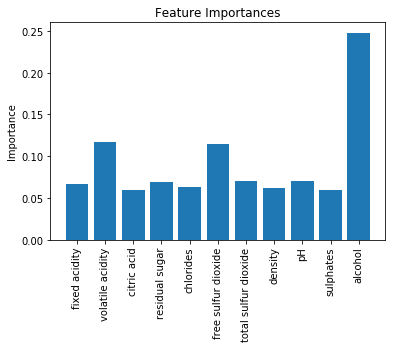

In [56]:
# Visualizations
# Variable Importances
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Feature Importances');

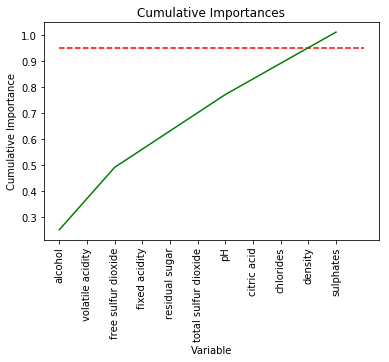

In [57]:
# A cumulative importance graph: shows the contribution to the overall importance 
# of each additional variable. 
# The dashed line - at 95% of total importance accounted for.
# After that some unimportant features (sulphates and may be density) can be removed.
# 95% - is an arbitrary threshold.

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [58]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
importantFeaturesCount = np.where(cumulative_importances > 0.95)[0][0] + 1
print('Count of features for 95% importance:', importantFeaturesCount)

# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:importantFeaturesCount]]
# Find the columns of the most important features
important_indices = [features.index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important features
important_train_features = X_train[:, important_indices]
important_test_features = X_test[:, important_indices]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Count of features for 95% importance: 10
Important train features shape: (3918, 10)
Important test features shape: (980, 10)


In [59]:
# As it can be seen from the results, they became worse than for the case with all the features
# Removing the so-called "unimportant" feature did not improve metrics

# Training and Evaluating on Important Features
# Train the expanded model on only the important features
rfg.fit(important_train_features, np.ravel(y_train));
# Make predictions on test data
predictions = rfg.predict(important_test_features)
# Performance metrics
print('R^2: ', rfg.score(important_test_features, y_test))
errors = abs(np.ravel(predictions) - np.ravel(y_test))
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (np.ravel(errors) / np.ravel(y_test))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

R^2:  0.49608680290235524
Average absolute error: 0.44 degrees.
Accuracy: 92.19 %.


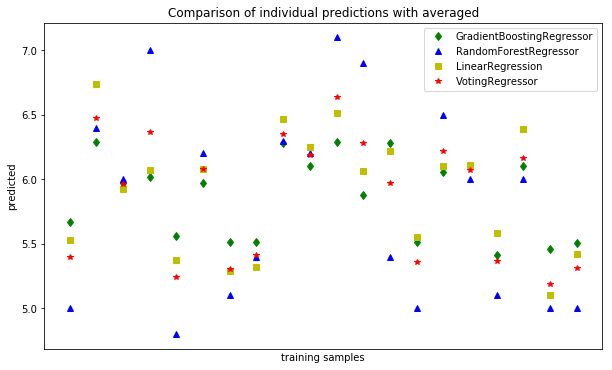

In [60]:
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
reg1.fit(X_train, y_train.values.ravel())
reg2.fit(X_train, y_train.values.ravel())
reg3.fit(X_train, y_train.values.ravel())
ereg.fit(X_train, y_train.values.ravel())

# for some 20 values
xt = X_train[:20]

plt.figure(figsize=(10, 6))
plt.plot(reg1.predict(xt), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(xt), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(xt), 'ys', label='LinearRegression')
plt.plot(ereg.predict(xt), 'r*', label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

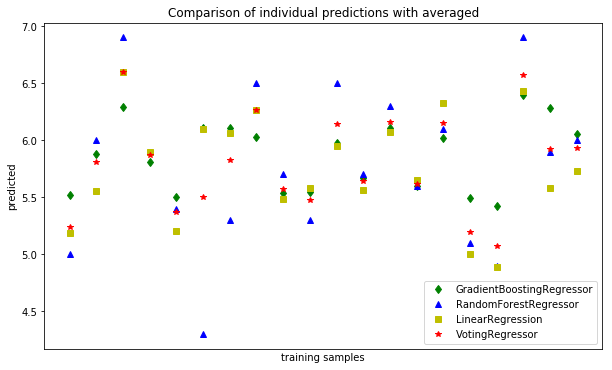

In [61]:
# for other 20 values
xt = X_test[:20]

plt.figure(figsize=(10, 6))
plt.plot(reg1.predict(xt), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(xt), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(xt), 'ys', label='LinearRegression')
plt.plot(ereg.predict(xt), 'r*', label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()